# A4 Face Detection and Recognition 
Student Name: Fulin Huang 

Student ID: 260740689 

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

## 1 Data Aquisition 

#### Test Image 

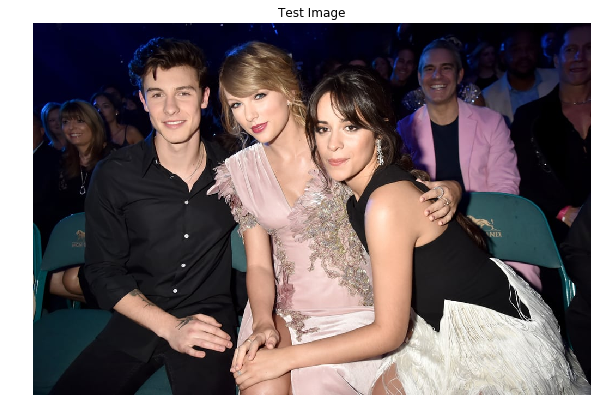

((-0.5, 1023.5, 681.5, -0.5), None)

In [5]:
# Image Reference:https://www.popsugar.com/celebrity/photo-gallery/44850420/image/44865671/Shawn-Mendes-Taylor-Swift-Camila-Cabello
test_image = cv2.imread('test.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(test_image),plt.title("Test Image")
plt.axis('off'), plt.show()